## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
len(df['user_id'])

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
len(df[(df['converted'] == True)]) / len(df['converted'])


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
len(df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')])

1928

f. Do any of the rows have missing values?

In [8]:
print ('No, none of the rows are missing values as can be seen in the information below. \n')

df.info();


No, none of the rows are missing values as can be seen in the information below. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
indexNames = df[ (df['group'] == 'treatment') & (df['landing_page'] == 'old_page') |  (df['group'] == 'control') & (df['landing_page'] == 'new_page')  ].index

df.drop(indexNames, inplace=True)

# For some reason the code df2 = df.drop(indexNames, inplace=True) didnt work here. 

df2 = df

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )

list_duplicates(df2['user_id']) 

[773192]

c. What is the row information for the repeat **user_id**? 

In [13]:
# Finding the location of the two rows that match user id 773192

df2.index[df2.user_id == 773192]

Int64Index([1899, 2893], dtype='int64')

In [14]:
# Viewing the contents of the rows for the duplicate user id

print(df2.loc[[1899]])
print(df2.loc[[2893]])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Dropping duplicates based on the user_id

df2.drop_duplicates(subset='user_id', keep='first', inplace = True)

# Verifying that only 1 row for user_id 773192 remains

df2.index[df2.user_id == 773192]

Int64Index([1899], dtype='int64')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
len(df2[(df2['converted'] == True)]) / len(df2['converted'])

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
(len(df2[(df2['group'] == 'control') & (df2['converted'] == True)]) / len(df2['group'] == 'control')) / (len(df2[(df2['group'] == 'control')]) / len(df2['group'])) 

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
(len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]) / len(df2['group'] == 'control')) / (len(df2[(df2['group'] == 'treatment')]) / len(df2['group'])) 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
len(df2[(df2['landing_page'] == 'new_page')]) / len(df2['landing_page'])

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the information I calculated above I would say that the new page does not lead to more conversions than the old page. The results that I computed showed that the probability of a visitor converting on either the new treatment page or the control were within fractions of each other. In addition, both probabilities of converting on either page were within a few fractions of conversion regarless of page. This shows that there is not difinitive evidence that the new page results in more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: **$p_{new}$** <= **$p_{old}$** The new page has the same or worse conversion rate than the old page. 


H1: **$p_{new}$** > **$p_{old}$** The new page has a better conversion rate than the old page. 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [20]:
# I am starting this section using the cleaned df2 data from the previous section. 

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = len(df2[(df2['landing_page'] == 'new_page')].converted)
n_new


145310

d. What is $n_{old}$?

In [24]:
n_old = len(df2[(df2['landing_page'] == 'old_page')].converted)
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [95]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [96]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [97]:
new_page_converted.mean() - old_page_converted.mean()

-0.0019248983641216855

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [101]:
# For loop to cacluclate 10000 p_new - p_old values 

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  11.,  145.,  560., 1631., 2787., 2725., 1500.,  524.,  100.,
          17.]),
 array([-4.46871191e-03, -3.56779684e-03, -2.66688177e-03, -1.76596669e-03,
        -8.65051622e-04,  3.58634500e-05,  9.36778522e-04,  1.83769359e-03,
         2.73860867e-03,  3.63952374e-03,  4.54043881e-03]),
 <a list of 10 Patch objects>)

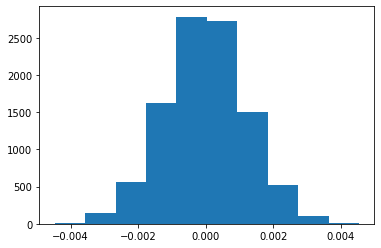

In [102]:
# Plotting histogram of p_diffs 

plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

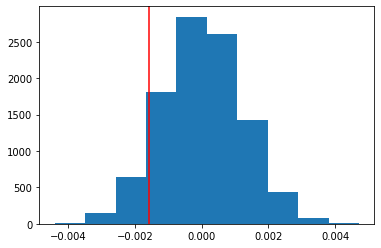

In [109]:
# Count unique users for all new_page and old_page coversions

convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# Calculate actual conversion rate for new / old pages

actual_new = convert_new / n_new
actual_old = convert_old / n_old

# Calculate difference for conversion rate 

cnv_diff = actual_new - actual_old

# Calculate values under the null using size and standard deviation of p_diffs

p_diffs = np.array(p_diffs)

p_size = p_diffs.size

p_std = p_diffs.std()

null_vals = np.random.normal(0, p_std, p_size)

# Plotting null distribution and obeserved statistic

plt.hist(null_vals);
plt.axvline(x=cnv_diff, color='red');


In [110]:
#Calculating P-value

(null_vals > cnv_diff).mean()

0.9083

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part J I computed the P-Value which in this case represents the probability of obtaining the observed results of this test assuming that the null hypothesis is correct. Specifically, this means that there is roughly a 90% chance that the new page has the same or a worse conversion rate than the old page. 



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [123]:
import statsmodels.api as sm

#using previously defined values for the following variables

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [124]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]), np.array([n_new,n_old]), alternative = 'larger')

z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [125]:
#importing scipy.stats norm for Z-Score and critical value calculations 

from scipy.stats import norm

norm.cdf(z_score), norm.ppf(1-(0.05/2))


(0.09494168724097551, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z-score that I calculated (-1.3109241984234394) was not greater than the critical value computed in the previous step (1.959963984540054). Based on this calculation we fail to reject the null hypothesis meaning that the new page and old page have no difference when it comes to the conversion rate. This outcome aligns with my findings in part J and K. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [126]:
#create intercept and ab_page columns per instructions

df2['intercept'] = 1

df2 = df2.join(pd.get_dummies(df2['landing_page']))

df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [135]:
# Using Logit: created regression model for ab_page & converted values. Baseline = control

log = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
calc = log.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [136]:
calc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:09:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-Value (ab_page) = 0.190

The difference here is that the regression model is calculating the P-Value based on the hypothesis that the old page has a higher conversion rate than the new page while the previous steps assume that the both the old and new page have the same conversion rate. Since the definitions of the null hypothesis in these two situations vary slightly, there is a difference in the P-Value. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding additional factors to the regression model will produce results that are more definitive; however, with more defintion comes additional layers of complexity. For example, we could use data from the users location or the timestamp of the event to add additional information about times of day and locations in which the conversion rate is higher. The ability to drill down into this data more specifically would help give us a better idea of which page has a higher conversion rate with respect to these additional factors. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [141]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [144]:
# View preview of data after previous script 
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [149]:
# Retrieve unique values for the "Country" column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [151]:
### Create the necessary dummy variables

# Create intercept variable column
df_new['intercept'] = 1

# Create country dummy variable columns by specific country

df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [154]:
#Per instructions selecting only two columns (UK and US) for regression model 

log2 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']])
calc2 = log2.fit()
calc2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               2.323e-05
Time:                        11:43:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Assuming that all other variables remain constant, the output above is stating that for every unit in which new_page decreases the chance to convert increases by 1.49%, for every unit that UK decreases the chance to convert increased by 4.1%, and lastly that for each unit that US increases the chance to covert increases by 1%. Neither of these is statistcally significant enough (based on P-Value > .05) to predict a change in coversion rate. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [157]:
#Adding new columns to df_new. I used multiplication of columns as addition would cause a 0 and 1 value to equal 1 in
# the new column when in fact I want it to equal 0. 

df_new['US_np'] = df_new['US'] * df_new['new_page']
df_new['UK_np'] = df_new['UK'] * df_new['new_page']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US,CA,US_np,UK_np
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1,0


In [158]:
### Fit Your Linear Model And Obtain the Results

log3 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK_np','US_np','UK','US']])
calc3 = log3.fit()
calc3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:               3.482e-05
Time:                        12:02:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page      -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK_np         -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_np          0.0314      0.027      1.181      0.238      -0.021       0.084
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

Looking at the relationship between country and new page we can see that there is no statistically significant link between these and predicting the conversion rate. This is shown by the P-Values of UK_np, US_np becuase they are not less than .05. This means that the country in which a visiting user lives does not have an effect on the page that the user lands on. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.